<a href="https://colab.research.google.com/github/Kiri0103/RN4020/blob/master/keras_segmentation_python_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install the package

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras


### Download the dataset

In [ ]:
! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

### Initialize the model

In [3]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )


58900480/58889256 [==============================] - 1s 0us/step


### Train the model

In [ ]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=10  
)

In [21]:
! pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from PIL import Image
import requests
import io

#url = 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Sapporo_Golf_Club_Yuni_Course%2C_Yuni_Hokkaido_Aerial_photograph.2015.jpg'
#img = Image.open(io.BytesIO(requests.get(url).content))
#img
! wget https://upload.wikimedia.org/wikipedia/commons/b/bf/Sapporo_Golf_Club_Yuni_Course%2C_Yuni_Hokkaido_Aerial_photograph.2015.jpg 

--2022-07-13 01:10:44--  https://upload.wikimedia.org/wikipedia/commons/b/bf/Sapporo_Golf_Club_Yuni_Course%2C_Yuni_Hokkaido_Aerial_photograph.2015.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1276689 (1.2M) [image/jpeg]
Saving to: ‘Sapporo_Golf_Club_Yuni_Course,_Yuni_Hokkaido_Aerial_photograph.2015.jpg’

Sapporo_Golf_Club_Y 100%[===================>]   1.22M  --.-KB/s    in 0.1s    

2022-07-13 01:10:45 (8.34 MB/s) - ‘Sapporo_Golf_Club_Yuni_Course,_Yuni_Hokkaido_Aerial_photograph.2015.jpg’ saved [1276689/1276689]



In [32]:
out = model.predict_segmentation(
    inp="/content/Sapporo_Golf_Club_Yuni_Course,_Yuni_Hokkaido_Aerial_photograph.2015.jpg",
    out_fname="/tmp/out.png"
)

In [33]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

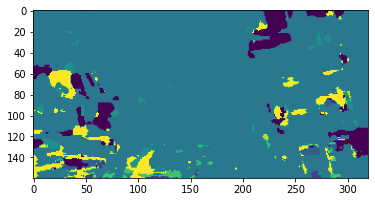

In [34]:
plt.imshow(out)

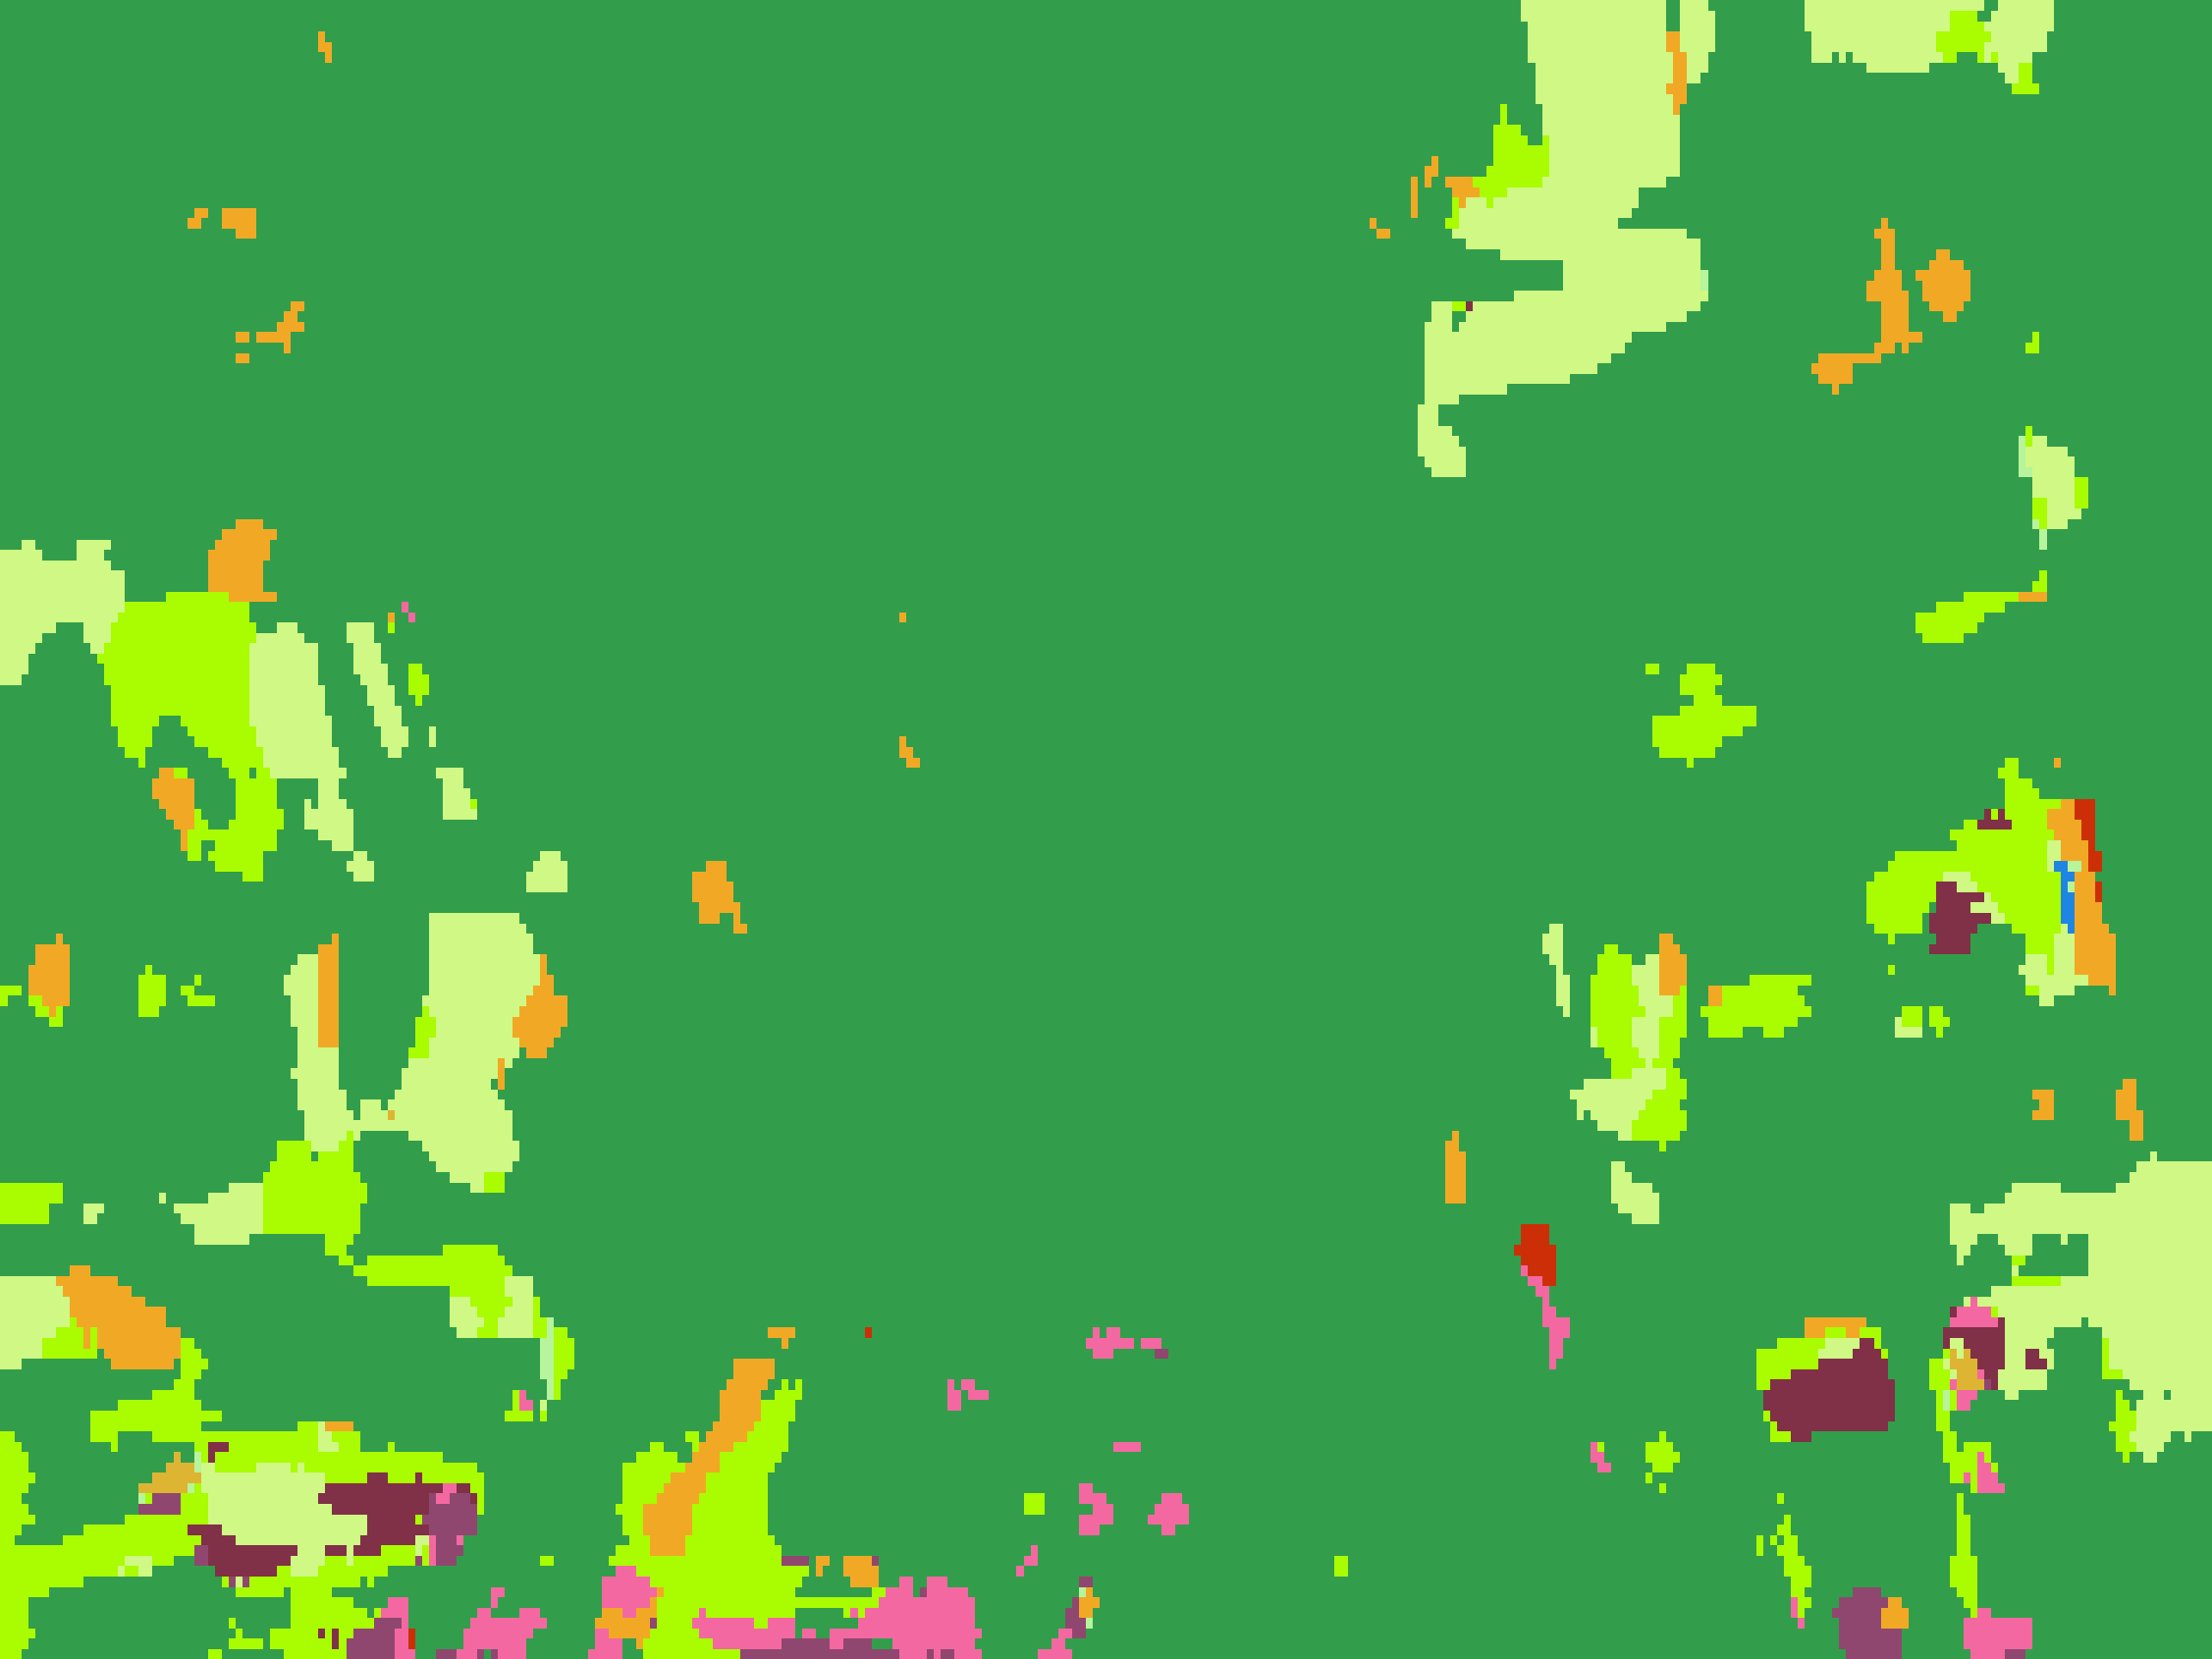

In [35]:
from IPython.display import Image
Image('/tmp/out.png')

In [36]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

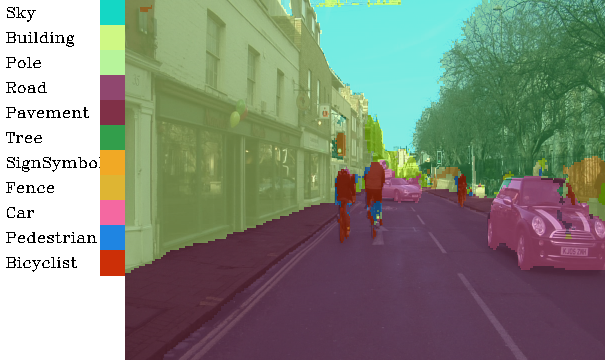

In [37]:
from IPython.display import Image
Image('/tmp/out.png')